# Clever generation of region proposals

Selective Search is an algorithm used in the R-CNN object detection model for generating region proposals. Its task is to generate region candidates that could contain an object with high probability. Such "promising" region candidates are then forwarded in the next step into a CNN for analysis. Since we have a limited computational time budget we can not afford it to analyse all region candidates. For this, Selective Search (SS) is the core ingredient of the R-CNN model.

# Load an example image

original image has shape (960, 1280, 3)
DPI= 72.0


<Figure size 432x288 with 0 Axes>

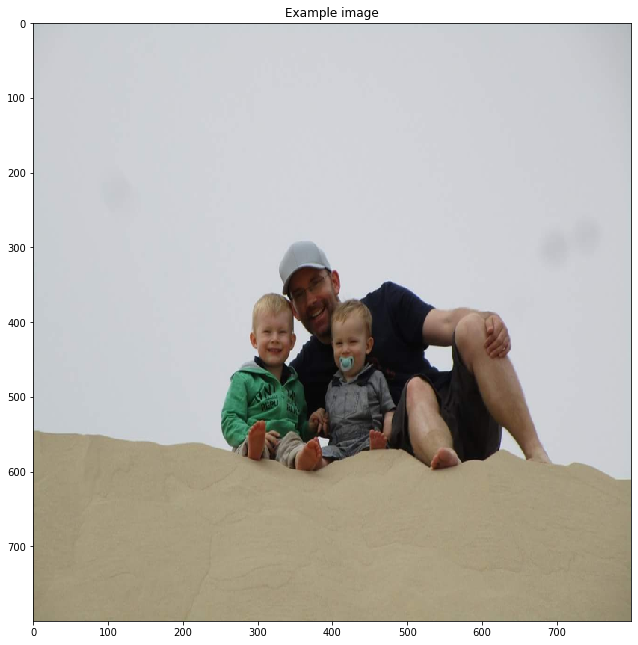

In [1]:
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = (800,800)

#filename = "test_images/banana.jpg"
filename = "test_images/sanddune.jpg"
#filename = "test_images/pickup_car.jpg"

img = cv2.imread(filename)
print("original image has shape", img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, IMG_SIZE)

# Try to set figure size to exact
# image size in pixels...
# Not that easy, since:
# Matplotlib specifies figure size
# in inches, not in pixels!
DPI = plt.figure().get_dpi()
print("DPI=", DPI)
fig_height = int(img.shape[0]/DPI)
fig_width  = int(img.shape[1]/DPI)
plt.figure(figsize=(fig_width, fig_height))

# display the image as a gray-scale image
plt.imshow(img)
plt.title("Example image")
plt.show()

# Run Selective Search on example image

In [2]:
# create Selective Search Segmentation Object
# using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


# set input image on which we will run segmentation
ss.setBaseImage(img)

# switch to fast but low recall Selective Search method
fast_or_quality = "f"
if (fast_or_quality == "f"):
    ss.switchToSelectiveSearchFast()
    
# switch to high recall but slow Selective Search method
else:
    ss.switchToSelectiveSearchQuality()


# run selective search segmentation on input image
rects = ss.process()
nr_region_proposals = len(rects)
print("Total number of region proposals: {}"
      .format(nr_region_proposals))

Total number of region proposals: 1975


In [3]:
print(rects)

[[210 261  82 204]
 [438 349  30  22]
 [310   0 490 599]
 ...
 [  0 386 800 414]
 [252 326 405 288]
 [  0 291 800 509]]


# Plot found region proposals

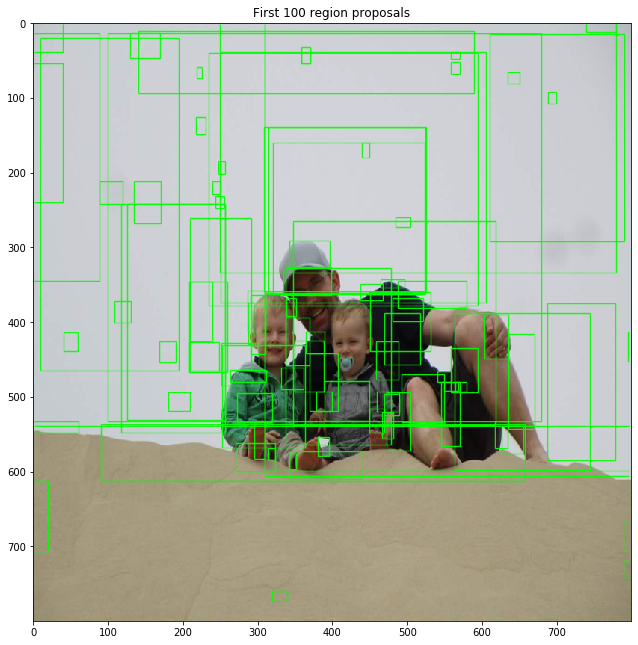

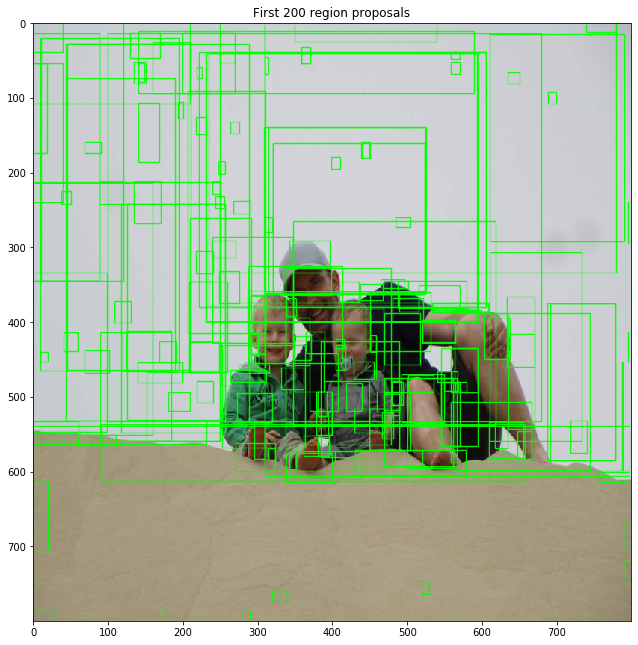

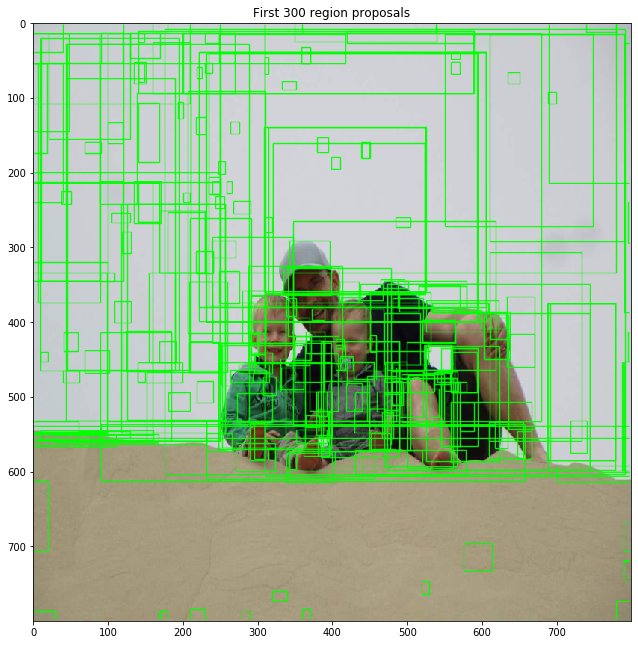

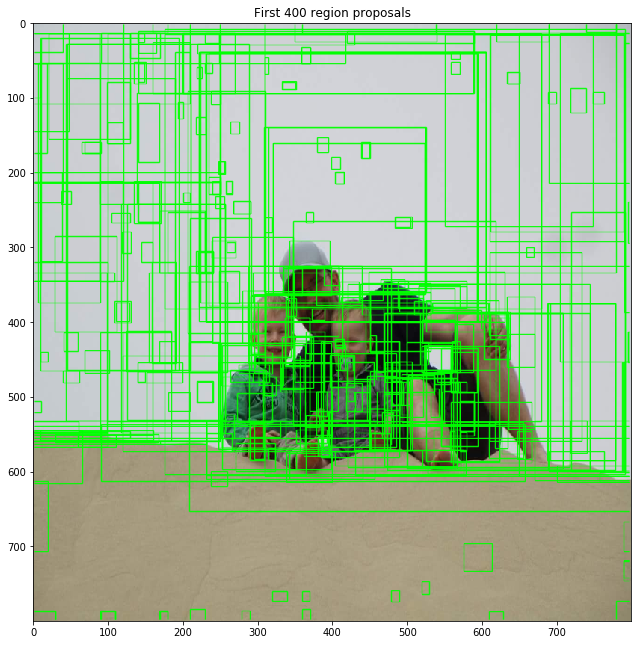

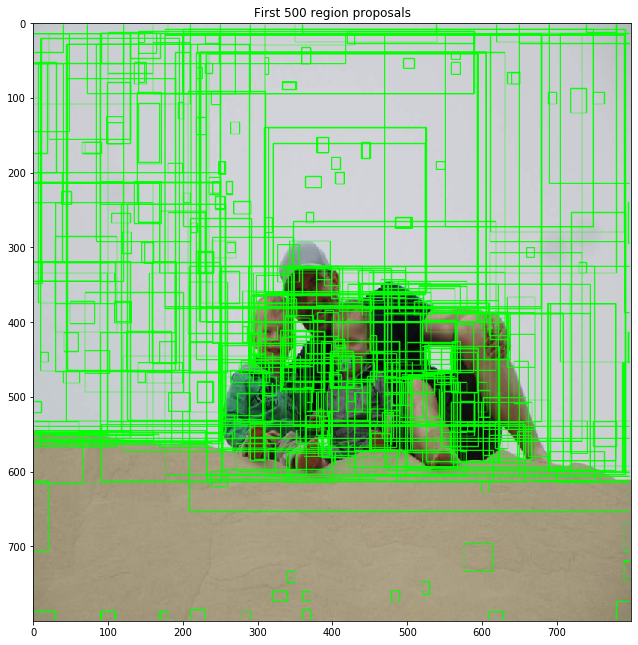

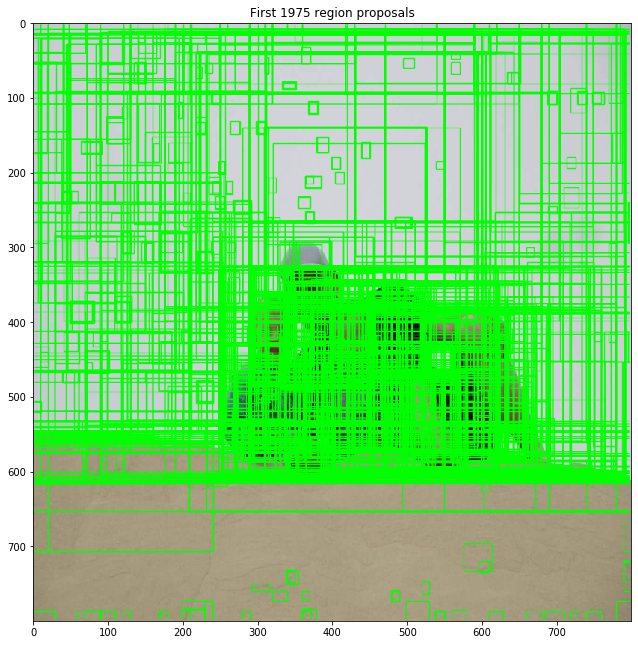

In [4]:
# create a copy of original image
visu = img.copy()

# iterate over all the region proposals
for i, rect in enumerate(rects):

    # get next region proposal as rect
    x, y, w, h = rect
        
    # draw a corresponding rectangle into the
    # visualization image
    cv2.rectangle(visu, (x, y), (x + w, y + h),
                  (0, 255, 0), 1, cv2.LINE_AA)
    
    # each 100 more region proposals,
    # draw the image
    if (i>0 and i<500 and (i+1)%100==0) or \
       (i == nr_region_proposals-1):
        
        plt.figure(figsize=(fig_width, fig_height))
        plt.imshow(visu)
        plt.title("First {} region proposals".
                  format(i+1))
        plt.show()
    
    

# The underlying segmentation algorithm of SS

Selective Search starts with an over-segmentation of an image. So we need an image segmentation method. In the original SS paper, the authors used the method

   [Efﬁcient graph-based image segmentation](http://people.cs.uchicago.edu/~pff/papers/seg-ijcv.pdf)
   
by Felzenszwalb and Huttenlocher, published in the International Journal of Computer Vision (IJCV), 2004.


<class 'numpy.ndarray'>
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]]
Felzenszwalb number of segments: 48


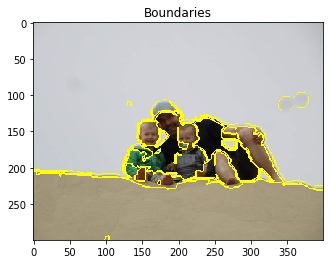

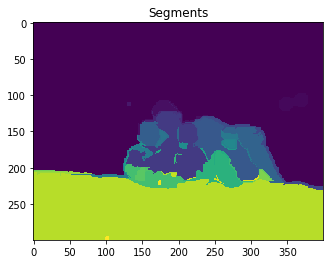

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.transform import resize


filename = "test_images/sanddune.jpg"
img = io.imread(filename)
newHeight = 400
newWidth = int(img.shape[0] * newHeight / img.shape[1])
img = resize(img, (newWidth, newHeight) )
print(type(img))

segments_fz = felzenszwalb(img, scale=400, sigma=0.7, min_size=20)
print(segments_fz)

nr_segments = len(np.unique(segments_fz))
print("Felzenszwalb number of segments: {}".format(nr_segments))

plt.imshow( (mark_boundaries(img, segments_fz)) )
plt.title("Boundaries")
plt.show()

plt.imshow( segments_fz )
plt.title("Segments")
plt.show()